# Ames, Iowa Housing Data: Predicting Sale Prices Across City Neighborhoods

## Problem Statement

Using the Ames housing sales data from 2006-2010, I am analyzing which factor(s) predict housing sale price. Additionally, I am looking at how sale prices differ across neighborhoods within Ames and which factors in the data (or not in the data) might contribute to these differences in prices. 

## Executive Summary

### Contents:

- [Data Import & Review](#Data-Import-and-Review)
- [Data Dictionary](#Data-Dictionary)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modeling](#Modeling)
- [Visualizations](#Visualizations)
- [Conclusions](#Conclusions)
- [Sources](#Sources)

## Data Import & Review

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [3]:
# Read in data
train = pd.read_csv('./datasets/train.csv')

In [4]:
test = pd.read_csv('./datasets/test.csv')

In [5]:
train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [6]:
test.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New


In [7]:
train.tail(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,155.0,LwQ,750.0,295.0,1200.0,GasA,TA,Y,SBrkr,1200,0,0,1200,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1956.0,Unf,1.0,294.0,TA,TA,Y,0,189,140,0,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,GasA,Gd,Y,SBrkr,1028,776,0,1804,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1999.0,Fin,2.0,442.0,TA,TA,Y,140,60,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


In [8]:
test.tail(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
876,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250,LwQ,492,210,952,GasA,Ex,Y,SBrkr,1211,0,0,1211,0,0,1,0,3,1,TA,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2007,WD
878,1939,535327160,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,BLQ,793,Unf,0,130,923,GasA,TA,Y,SBrkr,925,0,0,925,1,0,1,0,3,1,TA,5,Typ,2,TA,Attchd,1955.0,Unf,1,390,TA,TA,Y,81,0,0,0,0,0,NaN,GdWo,NaN,0,3,2007,WD


In [9]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [10]:
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [11]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [12]:
test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,834.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1976.796163,1.744027,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,25.695683,0.751162,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [13]:
train.shape

(2051, 81)

In [14]:
test.shape

(879, 80)

In [15]:
train.isnull().sum().head()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
dtype: int64

In [16]:
test.isnull().sum().head()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
dtype: int64

In [17]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [18]:
test.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

In [19]:
train.shape

(2051, 81)

In [20]:
test.shape

(879, 80)

## Data Dictionary

The following are the variables included in the train and test datasets. This data was collected from the Ames Assessor's Office on residential properties sold in Ames, IA from 2006 to 2010 (source provided at end of notebook). 


|Index|Feature|Type|Description|Key|
|---|---|---|---|---|
|1|Id|Int|Observation number||
|2|PID|Int|Parcel identification number  - can be used with city web site for parcel review||
|3|MS SubClass|Int|Identifies the type of dwelling involved in the sale.|020=1-STORY 1946 & NEWER ALL STYLES; 030=1-STORY 1945 & OLDER; 040=1-STORY W/FINISHED ATTIC ALL AGES; 045=1-1/2 STORY - UNFINISHED ALL AGES; 050=1-1/2 STORY FINISHED ALL AGES; 060=2-STORY 1946 & NEWER; 070=2-STORY 1945 & OLDER; 075=2-1/2 STORY ALL AGES; 080=SPLIT OR MULTI-LEVEL; 085=SPLIT FOYER; 090=DUPLEX - ALL STYLES AND AGES; 120=1-STORY PUD (Planned Unit Development) - 1946 & NEWER; 150=1-1/2 STORY PUD - ALL AGES; 160=2-STORY PUD - 1946 & NEWER; 180=PUD - MULTILEVEL - INCL SPLIT LEV/FOYER; 190=2 FAMILY CONVERSION - ALL STYLES AND AGES|
|4|MS Zoning|Object|Identifies the general zoning classification of the sale.|A=Agriculture; C=Commercial; FV=Floating Village Residential; I=Industrial; RH=Residential High Density; RL=Residential Low Density; RP=Residential Low Density Park; RM=Residential Medium Density|
|5|Lot Frontage|Float|Linear feet of street connected to property||
|6|Lot Area|Int|Lot size in square feet||
|7|Street|Object|Type of road access to property|Grvl=Gravel; Pave=Paved|
|8|Alley|Object|Type of alley access to property|Grvl=Gravel; Pave=Paved; NA=No alley access|
|9|Lot Shape|Object|General shape of property|Reg=Regular; IR1=Slightly irregular; IR2=Moderately Irregular; IR3=Irregular|
|10|Land Contour|Object|Flatness of the property|Lvl=Near Flat/Level	; Bnk=Banked - Quick and significant rise from street grade to buildingl HLS=Hillside - Significant slope from side to side; Low=Depression|
|11|Utilities|Object|Type of utilities available|AllPub=All public Utilities (E,G,W,& S)	; NoSewr=Electricity, Gas, and Water (Septic Tank); NoSeWa=Electricity and Gas Only; ELO=Electricity only|
|12|Lot Config|Object|Lot configuration|Inside=Inside lot; Corner=Corner lot; CulDSac=Cul-de-sac; FR2=Frontage on 2 sides of property; FR3=Frontage on 3 sides of property|
|13|Land Slope|Object|Slope of property|Gtl=Gentle slope; Mod=Moderate Slope; Sev=Severe Slope|
|14|Neighborhood|Object|Physical locations within Ames city limits (map available)|Blmngtn=Bloomington Heights; Blueste=Bluestem; BrDale=Briardale; BrkSide=Brookside; ClearCr=Clear Creek; CollgCr=College Creek; Crawfor=Crawford; Edwards= Edwards; Gilbert=Gilbert; Greens=Greens; GrnHill=Green Hills; IDOTRR=Iowa DOT and Rail Road; Landmrk=Landmark; MeadowV=Meadow Village; Mitchel=Mitchell; Names=North Ames; NoRidge=Northridge; NPkVill=Northpark Villa; NridgHt=Northridge Heights; NWAmes=Northwest Ames; OldTown=Old Town; SWISU=South & West of Iowa State University; Sawyer=Sawyer; SawyerW=Sawyer West; Somerst=Somerset; StoneBr=Stone Brook; Timber=Timberland; Veenker=Veenker|
|15|Condition 1|Object|Proximity to various conditions|Artery=Adjacent to arterial street; Feedr=Adjacent to feeder street; Norm=Normal; RRNn=Within 200' of North-South Railroad; RRAn=Adjacent to North-South Railroad; PosN=Near positive off-site feature--park, greenbelt, etc.; PosA=Adjacent to postive off-site feature; RRNe=Within 200' of East-West Railroad; RRAe=Adjacent to East-West Railroad|
|16|Condition 2|Object|Proximity to various conditions (if more than one is present)|Artery=Adjacent to arterial street; Feedr=Adjacent to feeder street; Norm=Normal; RRNn=Within 200' of North-South Railroad; RRAn=Adjacent to North-South Railroad; PosN=Near positive off-site feature--park, greenbelt, etc.; PosA=Adjacent to postive off-site feature; RRNe=Within 200' of East-West Railroad; RRAe=Adjacent to East-West Railroad|
|17|Bldg Type|Object|Type of dwelling|1Fam=Single-family Detached; 2FmCon=Two-family Conversion; originally built as one-family dwelling; Duplx=Duplex; TwnhsE=Townhouse End Unit; TwnhsI=Townhouse Inside Unit|
|18|House Style|Object|Style of dwelling|1Story=One story; 1.5Fin=One and one-half story: 2nd level finished; 1.5Unf=One and one-half story: 2nd level unfinished; 2Story=Two story; 2.5Fin=Two and one-half story: 2nd level finished; 2.5Unf=Two and one-half story: 2nd level unfinished; SFoyer=Split Foyer; SLvl=Split Level|
|19|Overall Qual|Int|Rates the overall material and finish of the house|10=Very Excellent; 9=Excellent; 8=Very Good; 7=Good; 6=Above Average	; 5=Average; 4=Below Average	; 3=Fair; 2=Poor; 1=Very Poor|
|20|Overall Cond|Int|Rates the overall condition of the house|10=Very Excellent; 9=Excellent; 8=Very Good; 7=Good; 6=Above Average	; 5=Average; 4=Below Average	; 3=Fair; 2=Poor; 1=Very Poor|
|21|Year Built|Int|Original construction date||
|22|Year Remod/Add|Int|Remodel date (same as construction date if no remodeling or additions)||
|23|Roof Style|Object|Type of roof|Flat=Flat; Gable=Gable; Gambrel=Gabrel (Barn); Hip=Hip; Mansard=Mansard; Shed=Shed|
|24|Roof Matl|Object|Roof material|ClyTile=Clay or Tile; CompShg=Standard (Composite) Shingle; Membran=Membrane; Metal=Metal; Roll=Roll; Tar&Grv=Gravel & Tar; WdShake=Wood Shakes; WdShngl=Wood Shingles|
|25|Exterior 1st|Object|Exterior covering on house|AsbShng=Asbestos Shingles; AsphShn=Asphalt Shingles; BrkComm=Brick Common; BrkFace=Brick Face; CBlock=Cinder Block; CemntBd=Cement Board; HdBoard=Hard Board; ImStucc=Imitation Stucco; MetalSd	Metal Siding; Other=Other; Plywood=Plywood; PreCast=PreCast; Stone=Stone; Stucco=Stucco; VinylSd=Vinyl Siding; Wd Sdng=Wood Siding; WdShing=Wood Shingles|
|26|Exterior 2nd|Object|Exterior covering on house (if more than one material)|AsbShng=Asbestos Shingles; AsphShn=Asphalt Shingles; BrkComm=Brick Common; BrkFace=Brick Face; CBlock=Cinder Block; CemntBd=Cement Board; HdBoard=Hard Board; ImStucc=Imitation Stucco; MetalSd	Metal Siding; Other=Other; Plywood=Plywood; PreCast=PreCast; Stone=Stone; Stucco=Stucco; VinylSd=Vinyl Siding; Wd Sdng=Wood Siding; WdShing=Wood Shingles|
|27|Mas Vnr Type|Object|Masonry veneer type|BrkCmn=Brick Common; BrkFace=Brick Face; CBlock=Cinder Block; None=None; Stone=Stone|
|28|Mas Vnr Area|Float|Masonry veneer area in square feet||
|29|Exter Qual|Int|Evaluates the quality of the material on the exterior|5=Ex=Excellent; 4=Gd=Good; 3=TA=Average/Typical; 2=Fa=Fair; 1=Po=Poor|
|30|Exter Cond|Int|Evaluates the present condition of the material on the exterior|5=Ex=Excellent; 4=Gd=Good; 3=TA=Average/Typical; 2=Fa=Fair; 1=Po=Poor|
|31|Foundation|Object|Type of Foundation|BrkTil=Brick & Tile; CBlock=Cinder Block; PConc=Poured Concrete; Slab=Slab; Stone=Stone; Wood=Wood|
|32|Bsmt Qual|Int|Evalutes the height of the basement|5=Ex=Excellent (100+ inches); 4=Gd=Good (90-99 inches); 3=TA=Typical (80-89 inches); 2=Fa=Fair (70-79 inches); 1=Po=Poor (<70 inches); 0=NA=No Basement|
|33|Bsmt Cond|Int|Evaluates the general condition of the basement|5=Ex=Excellent; 4=Gd=Good; 3=TA=Typical - slight dampness allowed; 2=Fa=Fair - dampness or some cracking or settling; 1=Po=Poor - Severe cracking, settling, or wetness; 0=NA=No Basement|
|34|Bsmt Exposure|Object|Refers to walkout or garden level walls|Gd=Good Exposure; Av=Average Exposure (split levels or foyers typically score average or above); Mn=Mimimum Exposure; No=No Exposure; NA=No Basement|
|35|BsmtFin Type 1|Object|Rating of basement finished area|GLQ=Good Living Quarters; ALQ=Average Living Quarters; BLQ=Below Average Living Quarters; Rec=Average Rec Room; LwQ=Low Quality; Unf=Unfinshed; NA=No Basement|action|
|36|BsmtFin SF 1|Float|Type 1 finished square feet||
|37|BsmtFinType 2|Object|Rating of basement finished area (if multiple types)|GLQ=Good Living Quarters; ALQ=Average Living Quarters; BLQ=Below Average Living Quarters; Rec=Average Rec Room; LwQ=Low Quality; Unf=Unfinshed; NA=No Basement|
|38|BsmtFin SF 2|Float|Type 2 finished square feet||
|39|Bsmt Unf SF|Float|Unfinished square feet of basement area||
|40|Total Bsmt SF|FLoat|Total square feet of basement area||
|41|Heating|Object|Type of heating|Floor=Floor Furnace; GasA=Gas forced warm air furnace; GasW=Gas hot water or steam heat; Grav=Gravity furnace; OthW=Hot water or steam heat other than gas; Wall=Wall furnace|
|42|HeatingQC|Int|Heating quality and condition|5=Ex=Excellent; 4=Gd=Good; 3=TA=Average/Typical; 2=Fa=Fair; 1=Po=Poor|
|43|Central Air|Object|Central air conditioning|N=No; Y=Yes|
|44|Electrical|Object|Electrical system|SBrkr=Standard Circuit Breakers & Romex; FuseA=Fuse Box over 60 AMP and all Romex wiring (Average); FuseF=60 AMP Fuse Box and mostly Romex wiring (Fair); FuseP=60 AMP Fuse Box and mostly knob & tube wiring (poor); Mix=Mixed|
|45|1st Flr SF|Int|First Floor square feet||
|46|2nd Flr SF|Int|Second floor square feet||
|47|Low Qual Fin SF|Int|Low quality finished square feet (all floors)||
|48|Gr Liv Area|Int|Above grade (ground) living area square feet||
|49|Bsmt Full Bath|Float|Basement full bathrooms||
|50|Bsmt Half Bath|Float|Basement half bathrooms||
|51|Full Bath|Int|Full bathrooms above grade||
|52|Half Bath|Int|Half baths above grade||action|
|53|Bedroom AbvGr|Int|Bedrooms above grade (does NOT include basement bedrooms)||
|54|Kitchen AbvGr|Int|Kitchens above grade||
|55|KitchenQual|Int|Kitchen quality|5=Ex=Excellent; 4=Gd=Good; 3=TA=Average/Typical; 2=Fa=Fair; 1=Po=Poor|
|56|TotRmsAbvGrd|Int|Total rooms above grade (does not include bathrooms)||
|57|Functional|Object|Home functionality (Assume typical unless deductions are warranted)|Typ=Typical Functionality; Min1=Minor Deductions 1; Min2=Minor Deductions 2; Mod=Moderate Deductions; Maj1=Major Deductions 1; Maj2=Major Deductions 2; Sev=Severely Damaged; Sal=Salvage only|
|58|Fireplaces|Int|Number of fireplaces||
|59|FireplaceQu|Object|Fireplace quality|Ex=Excellent - Exceptional Masonry Fireplace; Gd=Good - Masonry Fireplace in main level; TA=Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement; Fa=Fair - Prefabricated Fireplace in basement; Po=Poor - Ben Franklin Stove; NA=No Fireplace|	
|60|Garage Type|Object|Garage location|2Types=More than one type of garage; Attchd=Attached to home; Basment=Basement Garage; BuiltIn=Built-In (Garage part of house - typically has room above garage); CarPort=Car Port; Detchd=Detached from home; NA=No Garage|
|61|Garage Yr Blt|Float|Year garage was built||
|62|Garage Finish|Object|Interior finish of the garage|Fin=Finished; RFn=Rough Finished; Unf=Unfinished; NA=No Garage|
|63|Garage Cars|Float|Size of garage in car capacity||
|64|Garage Area|Float|Size of garage in square feet||
|65|Garage Qual|Object|Garage quality|Ex=Excellent; Gd=Good; TA=Average/Typical; Fa=Fair; Po=Poor; NA=No Garage|
|66|Garage Cond|Object|Garage condition|Ex=Excellent; Gd=Good; TA=Average/Typical; Fa=Fair; Po=Poor; NA=No Garage|
|67|Paved Drive|Object|Paved driveway|Y=Paved; P=Partial Pavement; N=Dirt/Gravel|		
|68|Wood Deck SF|Int|Wood deck area in square feet|
|69|Open Porch SF|Int|Open porch area in square feet|
|70|Enclosed Porch|Int|Enclosed porch area in square feet|
|71|3-Ssn Porch|Int|Three season porch area in square feet|
|72|Screen Porch|Int|Screen porch area in square feet|
|73|Pool Area|Int|Pool area in square feet|
|74|Pool QC|Object|Pool quality|Ex=Excellent; Gd=Good; TA=Average/Typical; Fa=Fair; NA=No Pool||action|
|75|Fence|Object|Fence quality|GdPrv=Good Privacy; MnPrv=Minimum Privacy; GdWo=Good Wood; MnWw=Minimum Wood/Wire; NA=No Fence|
|76|Misc Feature|Object|Miscellaneous feature not covered in other categories|Elev=Elevator; Gar2=2nd Garage (if not described in garage section); Othr=Other; Shed=Shed (over 100 SF); TenC=Tennis Court; NA=None|	
|77|Misc Val|Int|$Value of miscellaneous feature||
|78|Mo Sold|Int|Month Sold (MM)||
|79|Yr Sold|Int|Year Sold (YYYY)||
|80|Sale Type|Object|Type of sale|WD=Warranty Deed - Conventional; CWD=Warranty Deed - Cash; VWD=Warranty Deed - VA Loan; New=Home just constructed and sold; COD=Court Officer Deed/Estate; Con=Contract 15% Down payment regular terms; ConLw=Contract Low Down payment and low interest' ConLI=Contract Low Interest; ConLD=Contract Low Down; Oth=Other|
|81|SalePrice|Int|Sale price $$ (Target Variable||

In [21]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [22]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## Data Cleaning

In [23]:
# Examining the Null values
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [24]:
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [25]:
train.isnull().sum().sum()

9822

In [26]:
test.isnull().sum().sum()

4175

In [27]:
# There are 1911 missing values in the Alley column (Train), checking what percentage of total data this is
1911 / 2051

0.931740614334471

In [28]:
# Since 93% of the data is missing for Alley (Train), going to drop the column
train = train.drop('Alley', 1)

In [29]:
# There are 821 missing values in the Alley column (Test), checking what percentage of total data this is
821 / 879

0.9340159271899886

In [30]:
# Since 93% of the data is missing for Alley (Test), going to drop the column
test = test.drop('Alley', 1)

In [31]:
# There are 2042 missing values in the Pool QC (Train) column, checking what percentage of total data this is
2042 / 2051

0.9956118966357874

In [32]:
# Since 99% of the data is missing for Pool QC (Train), going to drop the column
train = train.drop('Pool QC', 1)

In [33]:
# There are 875 missing values in the Pool QC (Test) column, checking what percentage of total data this is
875 / 879

0.9954493742889647

In [34]:
# Since 99% of the data is missing for Pool QC (Test), going to drop the column
test = test.drop('Pool QC', 1)

In [35]:
# There are 1986 missing values in the Misc Feature (Train) column, checking what percentage of total data this is
1986 / 2051

0.9683081423695759

In [36]:
# Since 97% of the data is missing for Misc Feature (Train) going to drop the column
train = train.drop('Misc Feature', 1)

In [37]:
# There are 838 missing values in the Misc Feature (Test) column, checking what percentage of total data this is
838 / 879

0.9533560864618885

In [38]:
# Since 95% of the data is missing for Misc Feature (Test) going to drop the column
test = test.drop('Misc Feature', 1)

In [39]:
train.shape

(2051, 78)

In [40]:
test.shape

(879, 77)

In [41]:
train.isnull().sum().sum()

3883

In [42]:
test.isnull().sum().sum()

1641

In [43]:
# There are missing values across several of the basement categories (in both train and test). Since there is no 
# variable that specifically states if there is a basement or not, I am looking at the Total Basement SF column since 
# those that are at 0 do not have a basement. Looking first at the shape, it appears to be in line with the total 
# number of null values across the basement categories
train[train['Total Bsmt SF'] == 0].shape

(54, 78)

In [44]:
# looking now at the actual values to see if the other basement categories have null values (train)
train[train['Total Bsmt SF'] == 0].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
12,807,906226060,70,RL,120.0,26400,Pave,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,0,6,2009,WD,131000
93,811,906226100,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,GdPrv,0,6,2009,WD,118858
114,781,905228050,20,RL,NaN,9000,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,0,6,2009,WD,63900
146,888,908128060,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,0,7,2009,ConLD,198500
183,1554,910251050,20,A (agr),80.0,14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,0,2,2008,WD,13100


In [45]:
# Checking same for test
test[test['Total Bsmt SF'] == 0].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
15,2089,905480180,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,MnPrv,0,6,2007,WD
37,2071,905228020,20,RL,NaN,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,4,7,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseA,998,0,0,998,0,0,1,0,3,1,TA,5,Min2,0,NaN,2Types,1952.0,Unf,2,460,Fa,TA,Y,0,0,140,0,0,0,NaN,0,5,2007,WD
77,971,923202060,20,RL,100.0,21750,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,4,1960,2006,Hip,CompShg,HdBoard,HdBoard,BrkFace,75.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1771,0,0,1771,0,0,1,0,3,1,TA,9,Min1,1,TA,Attchd,1960.0,Unf,2,336,TA,TA,Y,0,0,0,0,0,0,GdPrv,0,11,2009,WD
79,1887,534276290,20,RL,NaN,8339,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,1959,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,882,0,0,882,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1959.0,RFn,1,294,TA,TA,Y,0,0,0,0,0,0,MnPrv,1200,7,2007,WD
113,2005,902427180,80,RM,76.0,11800,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,SLvl,4,7,1949,2002,Gable,CompShg,Stucco,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1382,0,0,1382,0,0,2,0,1,1,TA,6,Mod,1,TA,Attchd,1957.0,RFn,1,384,TA,TA,Y,0,40,0,0,0,0,NaN,0,5,2007,WD


In [46]:
# Replaced all the NaN values with "NA" which is one of the key values in this data type (train)
train['BsmtFin Type 1'].fillna('NA', inplace=True)

In [47]:
train["BsmtFin Type 1"].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', 'NA', 'BLQ', 'LwQ'], dtype=object)

In [48]:
# Replaced all the NaN values with "NA" which is one of the key values in this data type (test)
test['BsmtFin Type 1'].fillna('NA', inplace=True)

In [49]:
test["BsmtFin Type 1"].unique()

array(['Unf', 'GLQ', 'BLQ', 'Rec', 'ALQ', 'NA', 'LwQ'], dtype=object)

In [50]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3828

In [51]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1616

In [52]:
# Replaced all the NaN values with "NA" which is one of the key values in this data type (train)
train['BsmtFin Type 2'].fillna('NA', inplace=True)

In [53]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3772

In [54]:
# confirm shape isn't changing (train)
train.shape

(2051, 78)

In [55]:
# Replaced all the NaN values with "NA" which is one of the key values in this data type (test)
test['BsmtFin Type 2'].fillna('NA', inplace=True)

In [56]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1591

In [57]:
# confirm shape isn't changing (test)
test.shape

(879, 77)

In [58]:
# Replaced all the NaN values with "NA" which is one of the key values in this data type (train)
train['Bsmt Qual'].fillna('NA', inplace=True)

In [59]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3717

In [60]:
# Replaced all the NaN values with "NA" which is one of the key values in this data type (test)
test['Bsmt Qual'].fillna('NA', inplace=True)

In [61]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1566

In [62]:
# Replaced all the NaN values with "NA" which is one of the key values in this data type (train)
train['Bsmt Cond'].fillna('NA', inplace=True)

In [63]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3662

In [64]:
# Replaced all the NaN values with "NA" which is one of the key values in this data type (test)
test['Bsmt Cond'].fillna('NA', inplace=True)

In [65]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1541

In [66]:
# Replaced all the NaN values with "NA" which is one of the key values in this data type (train)
train['Bsmt Exposure'].fillna('NA', inplace=True)

In [67]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3604

In [68]:
# Replaced all the NaN values with "NA" which is one of the key values in this data type (test)
test['Bsmt Exposure'].fillna('NA', inplace=True)

In [69]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1516

In [70]:
# Replace the NaN values with "0" since this data type is numeric (train)
train['BsmtFin SF 1'].fillna(0, inplace=True)

In [71]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3603

In [72]:
# Replace the NaN values with "0" since this data type is numeric (train)
train['BsmtFin SF 2'].fillna(0, inplace=True)

In [73]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3602

In [74]:
# Replace the NaN values with "0" since this data type is numeric (train)
train['Bsmt Unf SF'].fillna(0, inplace=True)

In [75]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3601

In [76]:
# Replace the NaN values with "0" since this data type is numeric (train)
train['Total Bsmt SF'].fillna(0, inplace=True)

In [77]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3600

In [78]:
# There are 2 numerical garage columns (cars and area) that are missing 1 value each, going to change these to 0
# (train)
train['Garage Cars'].fillna(0.0, inplace=True)

In [79]:
train['Garage Area'].fillna(0.0, inplace=True)

In [80]:
# Confirmed the null value went down by correct amount
train.isnull().sum().sum()

3598

In [81]:
# There are missing values across several of the garage categories. They are all about the same number of null values
# so I am assuming those never had a garage built and change those to NA/0 (train)
train['Garage Type'].fillna('NA', inplace=True)

In [82]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3485

In [83]:
# There are missing values across several of the garage categories. They are all about the same number of null values
# so I am assuming those never had a garage built and change those to NA/0 (test)
test['Garage Type'].fillna('NA', inplace=True)

In [84]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1472

In [85]:
# fill in NaN values (train)
train['Garage Yr Blt'].fillna(0.0, inplace=True)

In [86]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3371

In [87]:
# fill in NaN values (test)
test['Garage Yr Blt'].fillna(0.0, inplace=True)

In [88]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1427

In [89]:
# fill in NaN values (train)
train['Garage Finish'].fillna('NA', inplace=True)

In [90]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3257

In [91]:
# fill in NaN values (test)
test['Garage Finish'].fillna('NA', inplace=True)

In [92]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1382

In [93]:
# fill in NaN values (train)
train['Garage Qual'].fillna('NA', inplace=True)

In [94]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3143

In [95]:
# fill in NaN values (test)
test['Garage Qual'].fillna('NA', inplace=True)

In [96]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1337

In [97]:
# fill in NaN values (train)
train['Garage Cond'].fillna('NA', inplace=True)

In [98]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

3029

In [99]:
# fill in NaN values (test)
test['Garage Cond'].fillna('NA', inplace=True)

In [100]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1292

In [101]:
# There are 1651 null values in the Fence column (train). Checking the value counts:
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [102]:
# (train) there are no NA values currently, I am going to assume the null values are the NA values and rename them:
train['Fence'].fillna('NA', inplace=True)

In [103]:
# Recheck Fence value counts (train)
train['Fence'].value_counts()

NA       1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

In [104]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

1378

In [105]:
# There are 707 null values in the Fence column (test). Checking the value counts:
test['Fence'].value_counts()

MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64

In [106]:
# (test) there are no NA values currently, I am going to assume the null values are the NA values and rename them:
test['Fence'].fillna('NA', inplace=True)

In [107]:
# Recheck Fence value counts (test)
test['Fence'].value_counts()

NA       707
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64

In [108]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

585

In [109]:
# There are 1000 NaN values in the Fireplace Quality (train) column. Looking at instances where the fireplace count 
# is at 0 to see if the quality column has nan values in those instances
train[train['Fireplaces'] == 0].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,0,3,2010,WD,130500
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,0,3,2010,WD,138500
6,2827,908186070,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NA,0,6,2006,New,140000


In [110]:
# It appears when Fireplace count (train) is at zero, the quality has a NaN value, so renaming those to NA
train['Fireplace Qu'].fillna('NA', inplace=True)

In [111]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

378

In [112]:
# There are 422 NaN values in the Fireplace Quality (test) column. Looking at instances where the fireplace count 
# is at 0 to see if the quality column has nan values in those instances
test[test['Fireplaces'] == 0].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,0,8,2006,WD
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,0,7,2007,WD
5,333,923228370,160,RM,21.0,1890,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,294,Unf,0,252,546,GasA,TA,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1972.0,Unf,1,286,TA,TA,Y,0,0,64,0,0,0,NA,0,6,2010,WD
6,1327,902427150,20,RM,52.0,8516,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1958,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,869,869,GasA,TA,Y,SBrkr,1093,0,0,1093,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1959.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NA,0,5,2008,WD


In [113]:
# It appears when Fireplace count (test) is at zero, the quality has a NaN value, so renaming those to NA
test['Fireplace Qu'].fillna('NA', inplace=True)

In [114]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

163

In [115]:
# There are only a couple of values for these next two columns that are missing, so replacing NaN with 0 (train)
train['Bsmt Full Bath'].fillna(0.0, inplace=True)

In [116]:
# Confirmed the null value went down by correct amount
train.isnull().sum().sum()

376

In [117]:
# (train)
train['Bsmt Half Bath'].fillna(0.0, inplace=True)

In [118]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

374

In [119]:
# There are a handful of values missing from the Mas Vnr Type and Area columns (train)
train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [120]:
# Checking what the type is for existing cases that have an area of 0 (train)
train[train['Mas Vnr Area'] == 0].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NA,0,6,2010,WD,190000
8,1942,535353130,20,RL,NaN,15783,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,MnPrv,400,6,2007,WD,112500


In [121]:
# Changing the missing types to None (train)
train['Mas Vnr Type'].fillna('None', inplace=True)

In [122]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

352

In [123]:
# There are a handful of values missing from the Mas Vnr Type and Area columns (test)
test['Mas Vnr Type'].value_counts()

None       534
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [124]:
# Checking what the type is for existing cases that have an area of 0 (test)
test[test['Mas Vnr Area'] == 0].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,0,7,2007,WD
5,333,923228370,160,RM,21.0,1890,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,294,Unf,0,252,546,GasA,TA,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,NA,Attchd,1972.0,Unf,1,286,TA,TA,Y,0,0,64,0,0,0,NA,0,6,2010,WD


In [125]:
# Changing the missing types to None (test)
test['Mas Vnr Type'].fillna('None', inplace=True)

In [126]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

162

In [127]:
# Changing the missing area to 0 (train)
train['Mas Vnr Area'].fillna(0.0, inplace=True)

In [128]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

330

In [129]:
# Changing the missing area to 0 (test)
test['Mas Vnr Area'].fillna(0.0, inplace=True)

In [130]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

161

In [131]:
# The Lot Frontage data seems to be missing, I can't tie it to any cause at the moment so I will change these values
# to zero rather than dropping the rows (train). 
train['Lot Frontage'].fillna(0.0, inplace=True)

In [132]:
# Confirmed the null value went down by correct amount (train)
train.isnull().sum().sum()

0

In [133]:
# The Lot Frontage data seems to be missing, I can't tie it to any cause at the moment so I will change these values
# to zero rather than dropping the rows (test). 
test['Lot Frontage'].fillna(0.0, inplace=True)

In [134]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

1

In [135]:
# Electrical has one missing data point, replacing with NA (test)
test['Electrical'].fillna('NA', inplace=True)

In [136]:
# Confirmed the null value went down by correct amount (test)
test.isnull().sum().sum()

0

In [137]:
train.shape

(2051, 78)

In [138]:
test.shape

(879, 77)

In [139]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1868.725987,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,454.133654,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [140]:
test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,8.790000e+02,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,56.955631,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.861206,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1875.594994,1.744027,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,34.338680,10047.335167,1.374756,1.128422,30.403527,20.454546,188.284115,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,436.640608,0.751162,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,0.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,40.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,60.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,78.500000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.000000,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [141]:
# It looks like there is an unrealistic value for garage year built (this data is from up to 2010) (train):
train[train['Garage Yr Blt'] > 2010]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,2261,916384070,20,RL,68.0,8298,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NA,0,9,2007,New,267300


In [142]:
train.shape

(2051, 78)

In [143]:
# Since this is only one value, the data for this series cannot be valid, and there is no way to collect the accurate 
# data, I am dropping the row from the dataframe (train).
train.drop([1699], inplace=True)

In [144]:
train.shape

(2050, 78)

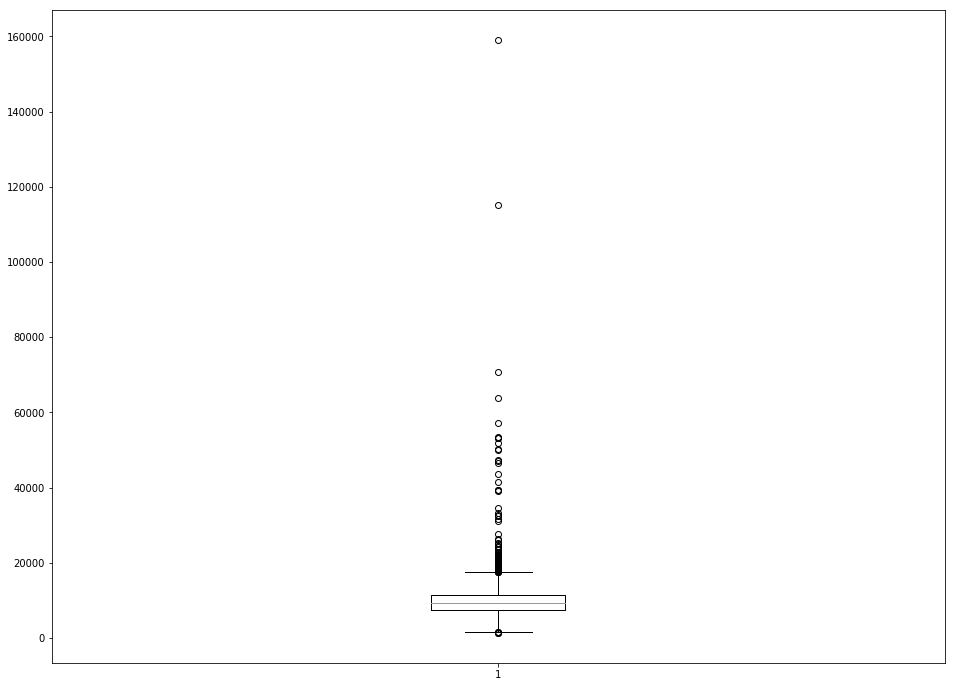

In [145]:
# box plot of lot area to look at outliers (train)
plt.figure(figsize=(16,12))

plt.boxplot(train['Lot Area']);

In [146]:
# There are two significant outliers but I'm going to leave them in for now (train)
# I will leave any outliers as is in test data. Just looking at the outliers and how they may affect the saleprice

In [147]:
# Looking at lowest sale prices to see if anything should be removed. 
train[train['SalePrice'] < 20_000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NA,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NA,0,2,2008,WD,13100
1628,182,902207130,30,RM,68.0,9656,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,832,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NA,0,6,2010,WD,12789


In [148]:
# both of the owest prices were sold via warranty deed - checking if that is a common home type
train['Sale Type'].value_counts()

WD       1781
New       159
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: Sale Type, dtype: int64

In [149]:
# Checking that all homes have all utilities
train['Utilities'].value_counts()

AllPub    2048
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

In [150]:
# There are a couple of homes without certain utilities. While concerning, not sure how to include this in a 
# predictive model since there are only 2 datapoints affected by it
train[train['Utilities'] == 'NoSeWa']
# train[train['Utilities'] == 'NoSeWr']

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
561,956,916176030,20,RL,0.0,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0,118,0,0,233,0,NA,0,1,2009,COD,137500


## Exploratory Data Analysis

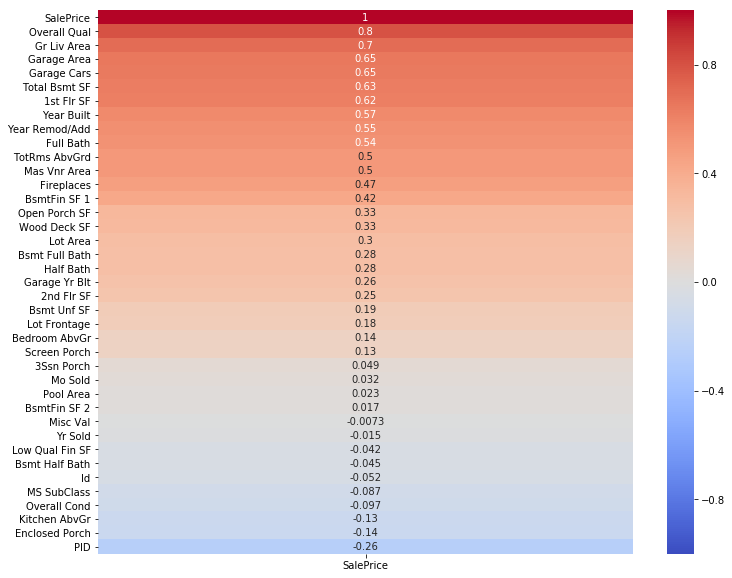

In [151]:
# creating a heatmap of the values to determine the strongest correlations before any feature engineering (train)
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, 
            cmap='coolwarm', vmin=-1, vmax=1);

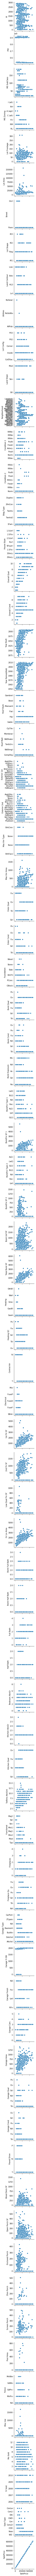

In [152]:
# Creating a pairplot to again look at the relationships (train)
sns.pairplot(train, x_vars=['SalePrice'], y_vars=train.columns);

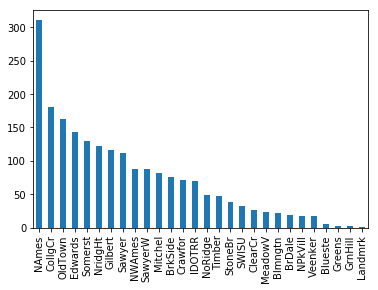

In [153]:
# look at value counts by neighborhood (train)
train['Neighborhood'].value_counts().plot(kind='bar')

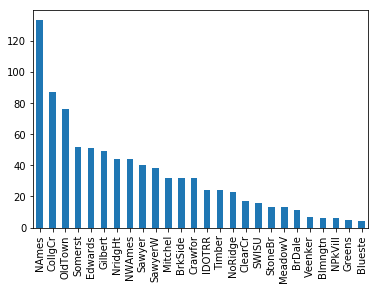

In [154]:
# look at value counts by neighborhood (test)
test['Neighborhood'].value_counts().plot(kind='bar')

In [155]:
train['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [156]:
test['Neighborhood'].nunique()

26

In [157]:
# Difference in Neighborhoods
# TRAIN (28)
# 'GrnHill', 'Landmrk'

# BOTH (26)
# 'Sawyer', 'NAmes', 'Timber', 'NWAmes', 'SWISU', 'Blmngtn', 'NPkVill', 'Edwards', 'Greens', 'Blueste', 'StoneBr', 
# 'Veenker', 'BrDale', 'NoRidge', 'NridgHt', 'Crawfor', 'ClearCr','BrkSide''Somerst', 'Mitchel', 'SawyerW', 
# 'IDOTRR','MeadowV', 'CollgCr', 'OldTown', 'Gilbert',


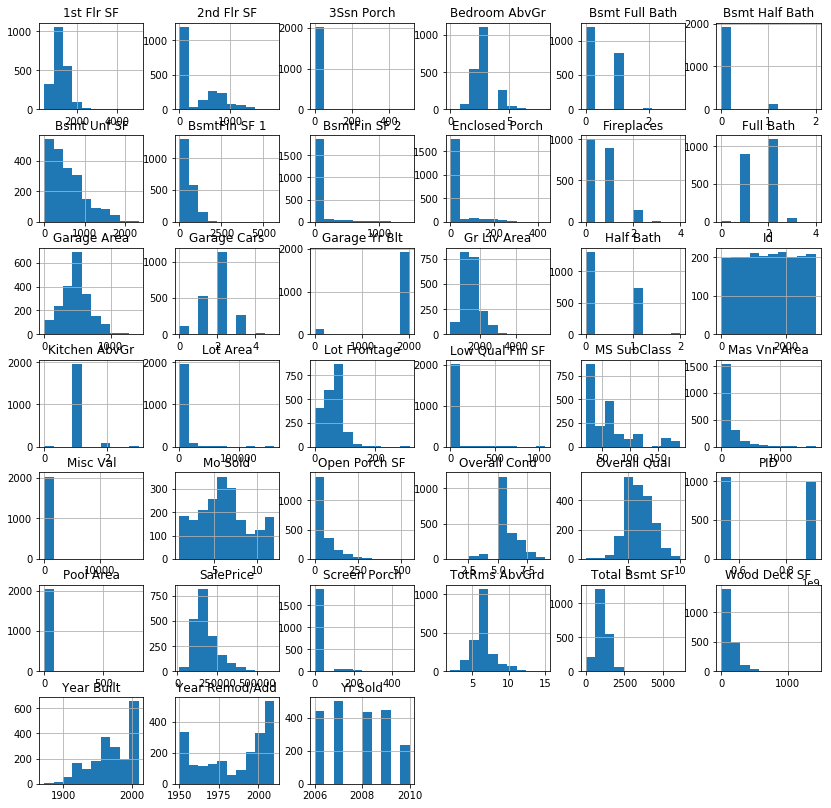

In [158]:
# Loook at distrubtions of variables (train)
train.hist(figsize=(14,14))
plt.show;
# target variable is not normally distributed

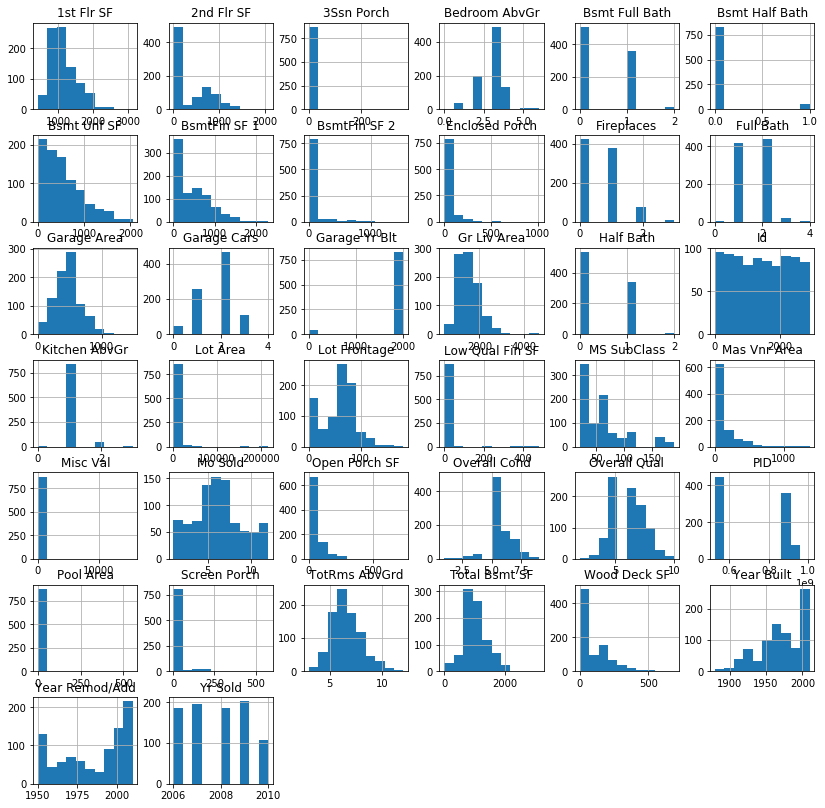

In [159]:
# Loook at distrubtions of variables (test)
test.hist(figsize=(14,14))
plt.show;

In [160]:
# Adding a total square footage column by combining Total Bsmt SF and GR Liv Area (train)
train['Total SF'] = train['Total Bsmt SF'] + train['Gr Liv Area']

In [161]:
# Adding a total square footage column by combining Total Bsmt SF and GR Liv Area (test)
test['Total SF'] = test['Total Bsmt SF'] + test['Gr Liv Area']

In [162]:
# Adding a total full bathroom column by combining Full Bath and Bsmt Full Bath (train)
train['Total Full Bath'] = train['Bsmt Full Bath'] + train['Full Bath']

In [163]:
# Adding a total full bathroom column by combining Full Bath and Bsmt Full Bath (test)
test['Total Full Bath'] = test['Bsmt Full Bath'] + test['Full Bath']

In [164]:
train.shape

(2050, 80)

In [165]:
test.shape

(879, 79)

In [166]:
# Adding a total half bathroom column by combining Half Bath and Bsmt Half Bath (train)
train['Total Half Bath'] = train['Bsmt Half Bath'] + train['Half Bath']

In [167]:
# Adding a total half bathroom column by combining Half Bath and Bsmt Half Bath (test)
test['Total Half Bath'] = test['Bsmt Half Bath'] + test['Half Bath']

In [168]:
# Since a half bath holds less value to a homebuyer or seller, it shouldn't be counted the same way that a full bath
# does. I'm going to change the values in the Half Bath columns so that 1 bath = 0.1 bath columns. This is a method
# taken from another home sales dataset and analysis 
# source: (https://www.tandfonline.com/doi/full/10.1080/10691898.2008.11889569)

# Applying to train data:
train['Total Half Bath'] = train['Total Half Bath'] * 0.1

In [169]:
# Applying to test data:
test['Total Half Bath'] = test['Total Half Bath'] * 0.1

In [170]:
# Creating a total bathroom column by combining full and half bathrooms into one column (Train)
train['Total Bathrooms'] = train['Total Half Bath'] + train['Total Full Bath']

In [171]:
# Creating a total bathroom column by combining full and half bathrooms into one column (Test)
test['Total Bathrooms'] = test['Total Half Bath'] + test['Total Full Bath']

In [172]:
test['Total Bathrooms'].value_counts()

2.0    268
2.1    169
1.0    128
1.1    100
3.0     93
3.1     89
4.0      8
2.2      7
1.2      7
4.1      6
4.2      2
3.2      1
6.2      1
Name: Total Bathrooms, dtype: int64

In [173]:
# Creating an interaction term between Garage Cars and Fireplaces (Logic is that individually these might not warrant
# much of an increase in price, but together they might). (train)
train['Garages & Fireplaces'] = train['Garage Cars'] * train['Fireplaces']

In [174]:
# Creating an interaction term between Garage Cars and Fireplaces (Logic is that individually these might not warrant
# much of an increase in price, but together they might). (test)
test['Garages & Fireplaces'] = test['Garage Cars'] * test['Fireplaces']

In [175]:
# Creating a new column "Outdoor Space SF" to combine all possible porch/deck SF (train)
train['Outdoor Space SF'] = train['Wood Deck SF'] + train['Open Porch SF'] + train['Enclosed Porch'] + train['3Ssn Porch'] + train['Screen Porch']

In [176]:
# Creating a new column "Outdoor Space SF" to combine all possible porch/deck SF (test)
test['Outdoor Space SF'] = test['Wood Deck SF'] + test['Open Porch SF'] + test['Enclosed Porch'] + test['3Ssn Porch'] + test['Screen Porch']

In [177]:
train.shape

(2050, 84)

In [178]:
test.shape

(879, 83)

In [179]:
# Creating a new interaction term of pool area and wood deck (train)
train['Pool & Deck'] = train['Pool Area'] * train['Wood Deck SF']

In [180]:
# Creating a new interaction term of pool area and wood deck (test)
test['Pool & Deck'] = test['Pool Area'] * test['Wood Deck SF']

In [181]:
# Create Paved Drive dummy columns and add to dataframe (train)
paved_dummies_tr = pd.get_dummies(train[['Paved Drive']], drop_first=True)
train = train.join(paved_dummies_tr)

In [182]:
# Confirm it was added (train)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Total SF,Total Full Bath,Total Half Bath,Total Bathrooms,Garages & Fireplaces,Outdoor Space SF,Pool & Deck,Paved Drive_P,Paved Drive_Y
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,0,3,2010,WD,130500,2204.0,2.0,0.1,2.1,0.0,44,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,0,4,2009,WD,220000,3035.0,3.0,0.1,3.1,2.0,74,0,0,1
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,0,1,2010,WD,109000,2114.0,2.0,0.0,2.0,0.0,52,0,0,1
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,0,4,2010,WD,174000,1828.0,2.0,0.1,2.1,0.0,100,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,0,3,2010,WD,138500,2121.0,2.0,0.0,2.0,0.0,59,0,0,0


In [183]:
# Create Paved Drive dummy columns and add to dataframe (test)
paved_dummies_te = pd.get_dummies(test[['Paved Drive']], drop_first=True)
test = test.join(paved_dummies_te)

In [184]:
# Confirm it was added (test)
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Total SF,Total Full Bath,Total Half Bath,Total Bathrooms,Garages & Fireplaces,Outdoor Space SF,Pool & Deck,Paved Drive_P,Paved Drive_Y
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,0,4,2006,WD,2948,2,0.0,2.0,0,172,0,0,1
1,2718,905108090,90,RL,0.0,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,0,8,2006,WD,3934,2,0.0,2.0,0,170,0,0,1
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,0,9,2006,New,2150,3,0.1,3.1,2,124,0,0,1
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,0,7,2007,WD,1936,1,0.0,1.0,0,184,0,0,0
4,625,535105100,20,RL,0.0,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,0,7,2009,WD,2788,2,0.1,2.1,4,261,0,0,1


In [185]:
train.shape

(2050, 87)

In [186]:
test.shape

(879, 86)

In [187]:
# Create Neighborhood dummy columns and add to dataframe (train)
hood_dummies_tr = pd.get_dummies(train[['Neighborhood']], drop_first=True)
train = train.join(hood_dummies_tr)

In [188]:
# Create Neighborhood dummy columns and add to dataframe (test)
hood_dummies_te = pd.get_dummies(test[['Neighborhood']], drop_first=True)
test = test.join(hood_dummies_te)

In [189]:
train.shape

(2050, 114)

In [190]:
test.shape

(879, 111)

In [191]:
# Create a bathroom and bedroom interaction term (train)
train['Total Bath * Bed'] = train['Total Bathrooms'] * train['Bedroom AbvGr']

In [192]:
# Create a bathroom and bedroom interaction term (test)
test['Total Bath * Bed'] = test['Total Bathrooms'] * test['Bedroom AbvGr']

In [193]:
# There is a KitchenQual column that is an object type with a specific set of rankings
test['Kitchen Qual'].value_counts()

TA    447
Gd    354
Ex     54
Fa     23
Po      1
Name: Kitchen Qual, dtype: int64

In [194]:
# Converting these symbols to numbers, which will also turn the object into an int. (train)
train['Kitchen Qual'] = train['Kitchen Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [195]:
# Converting these symbols to numbers, which will also turn the object into an int. (test)
test['Kitchen Qual'] = test['Kitchen Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [196]:
# Converting Exter Qual symbols to numbers, which will also turn the object into an int. (train)
train['Exter Qual'] = train['Exter Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [197]:
# Converting Exter Qual symbols to numbers, which will also turn the object into an int. (test)
test['Exter Qual'] = test['Exter Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [198]:
# Converting Exter Cond symbols to numbers, which will also turn the object into an int. (train)
train['Exter Cond'] = train['Exter Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [199]:
# Converting Exter Qual symbols to numbers, which will also turn the object into an int. (test)
test['Exter Cond'] = test['Exter Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [200]:
# Creating interaction term for Exterior condition and quality (train)
train['Exter Qual * Cond'] = train['Exter Qual'] * train['Exter Cond']

In [201]:
# Creating interaction term for Exterior condition and quality (test)
test['Exter Qual * Cond'] = test['Exter Qual'] * test['Exter Cond']

In [202]:
# Converting Heating QC symbols to numbers, which will also turn the object into an int. (train)
train['Heating QC'] = train['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [203]:
# Converting Heating QC symbols to numbers, which will also turn the object into an int. (test)
test['Heating QC'] = test['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [204]:
# Converting Bsmt Qual symbols to numbers, which will also turn the object into an int. (train)
train['Bsmt Qual'] = train['Bsmt Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

In [205]:
# Converting Bsmt Qual symbols to numbers, which will also turn the object into an int. (test)
test['Bsmt Qual'] = test['Bsmt Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

In [206]:
# Converting Bsmt Cond symbols to numbers, which will also turn the object into an int. (train)
train['Bsmt Cond'] = train['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

In [207]:
# Converting Bsmt Cond symbols to numbers, which will also turn the object into an int. (test)
test['Bsmt Cond'] = test['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

In [208]:
# Creating an interaction term for the Bsmt Qual and condition (train)
train['Bsmt Qual * Cond'] = train['Bsmt Qual'] * train['Bsmt Cond']

In [209]:
# Creating an interaction term for the Bsmt Qual and condition (test)
test['Bsmt Qual * Cond'] = test['Bsmt Qual'] * test['Bsmt Cond']

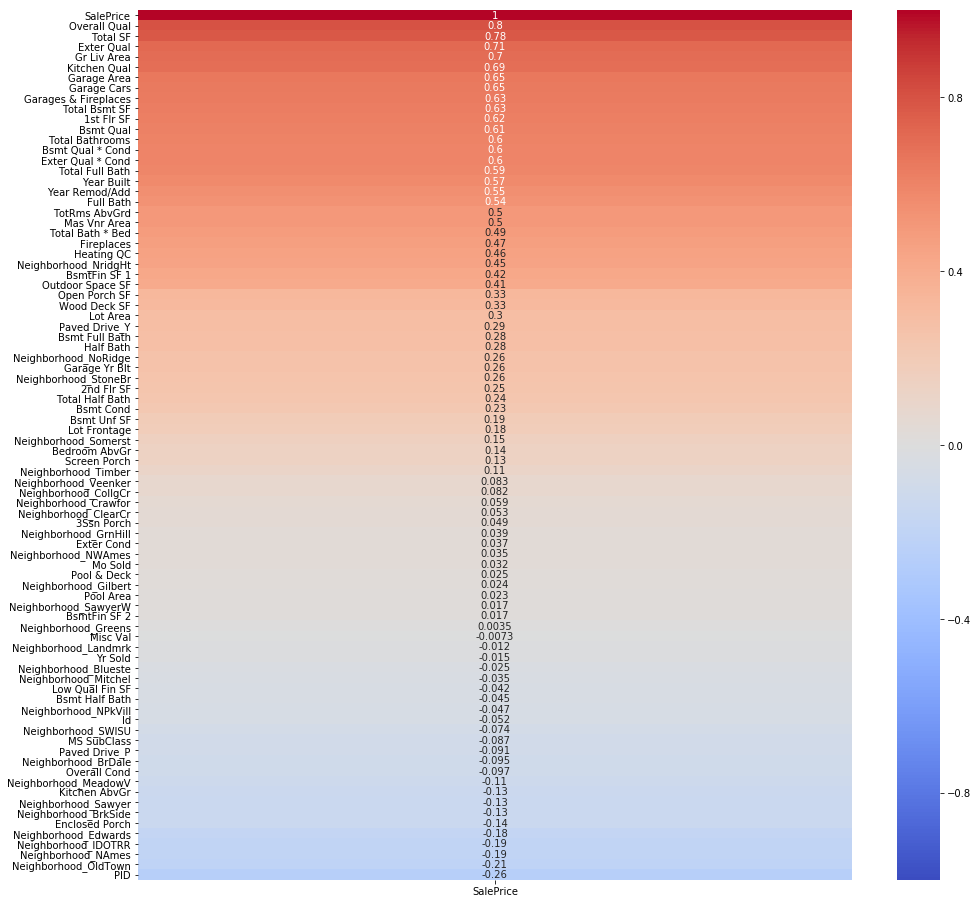

In [210]:
# Create another heatmap after the addition of more features
plt.figure(figsize=(16,16))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

In [211]:
train.groupby(by='Neighborhood')['SalePrice'].mean().sort_values(ascending=True)

Neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     240492.872340
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: SalePrice, dtype: float64

## Modeling

### Model Attempt 1

In attempt 1, I picked the strongest correlated variables that came as existing variables with the dataset and I used a linear regression. 

In [212]:
features_1 = ['Overall Qual', 'Gr Liv Area', '1st Flr SF', 'Garage Area', 'Total Bsmt SF', 'BsmtFin SF 1']

In [213]:
# define features and target (train)
X_train = train[features_1]
y_train = train['SalePrice']

In [214]:
# define features (test)
X_test = test[features_1]

In [215]:
# scaling train and test
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test) 

In [216]:
# instantiate model
linr = LinearRegression()

In [217]:
# cross val
cross_val_score(linr, X_train_sc, y_train, cv=5).mean()

0.7826300328472493

In [218]:
# model fit (fit train)
linr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
# score train
linr.score(X_train_sc, y_train)

0.7878452860328843

In [220]:
# predict with test
pred_1 = linr.predict(X_test_sc)

In [221]:
# Create a new dataframe for the submission file
submission_1 = pd.DataFrame(pred_1, index=test['Id'], columns=['SalePrice'])
submission_1.head()

,SalePrice
Id,
2658,181820.730010
2718,189045.623274
2414,193263.989840
1989,117693.668827
625,186324.318726


In [222]:
# Convert submission dataframe to csv
submission_1.to_csv('./datasets/submission_1.csv', index=True)

### Model Attempt 2

For attempt 2, I did some feature engineering before submitting. I created new total columns (SF, full and half baths, patio/porch SF, etc) for some recurring variables that were separated into above ground, basement, and outdoor categories. I combined some features into interaction columns that may be related to a higher sales price based on common knowledge, like a wood deck and a pool, or garage space for cars and fireplaces. I also created several dummy variables, for the paved drive and neighborhood points. I included all paved drive dummies, but only included the 5 highest correlated neighborhood dummies. 

I modified the Total Half Bath variable after the initial submission of this model. I changed 1 half bathroom to be equivalent to 0.1 bathrooms. I submitted this model again as my fourth submission after this modification.

In [223]:
features_2 = ['Total SF', 'Total Full Bath', 'Total Half Bath', 'Garages & Fireplaces', 'Outdoor Space SF', 
              'Pool & Deck', 'Paved Drive_Y', 'Garage Area', 'Overall Qual', 'Gr Liv Area', 
              'Garage Cars', 'Total Bsmt SF', 'Paved Drive_P', 'Lot Area', 'Kitchen AbvGr', 'Wood Deck SF', 
              'TotRms AbvGrd', 'Pool Area', 'Year Built', 'Year Remod/Add', 'Neighborhood_NoRidge', 
              'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Neighborhood_Timber']

In [224]:
# define features and target (train)
X_train = train[features_2]
y_train = train['SalePrice']

In [225]:
# define features (test)
X_test = test[features_2]

In [226]:
# scaling train and test
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test) 

In [227]:
# instantiate model
linr_2 = LinearRegression()

In [228]:
# cross val
cross_val_score(linr_2, X_train_sc, y_train, cv=5).mean()

0.8290324657610751

In [229]:
# model fit (fit train)
linr_2.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
# score train
linr_2.score(X_train_sc, y_train)

0.8418686420235636

In [231]:
# predict with test
pred_2 = linr_2.predict(X_test_sc)

In [232]:
# Create a new dataframe for the submission file
submission_2 = pd.DataFrame(pred_2, index=test['Id'], columns=['SalePrice'])
submission_2.head()

,SalePrice
Id,
2658,143534.691858
2718,170420.748521
2414,212666.183284
1989,120052.168618
625,194019.898339


In [233]:
# Convert submission dataframe to csv
submission_2.to_csv('./datasets/submission_2.csv', index=True)

### Model Attempt 3

For my third attempt at a model, I tryed using the majority of all numeric variables, except for those that may have been be redundant (i.e. didn't use dummy variables and the original variable the dummies were made from). 

In [234]:
features_3 = ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 
              'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
              '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 
              'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 
              'Garage Yr Blt', 'Garage Cars', 'Garage Area','Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 
              '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Total SF', 
              'Total Full Bath', 'Total Half Bath', 'Garages & Fireplaces', 'Outdoor Space SF', 'Pool & Deck', 
              'Paved Drive_P', 'Paved Drive_Y', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 
              'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 
              'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_IDOTRR', 
              'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 
              'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 
              'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 
              'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']

In [235]:
# define features and target (train)
X_train = train[features_3]
y_train = train['SalePrice']

In [236]:
# define features (test)
X_test = test[features_3]

In [237]:
# scaling train and test
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test) 

In [238]:
# instantiate model
# knn_3 = KNeighborsClassifier(n_neighbors=10)
linr_3 = LinearRegression()

In [239]:
# model fit (fit train)
# knn_3.fit(X_train_sc, y_train)
linr_3.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [240]:
# score train
# knn_3.score(X_train_sc, y_train)
linr_3.score(X_train_sc, y_train)

0.8741403009360503

In [241]:
# cross val
cross_val_score(linr_3, X_train_sc, y_train, cv=5).mean()

0.8388673557458395

In [242]:
# predict with test
pred_3 = linr_3.predict(X_test_sc)

In [243]:
# Create a new dataframe for the submission file
submission_3 = pd.DataFrame(pred_3, index=test['Id'], columns=['SalePrice'])
submission_3.head()

,SalePrice
Id,
2658,128688.152953
2718,148775.941070
2414,206819.474376
1989,108307.957640
625,195092.794511


In [244]:
# Convert submission dataframe to csv
submission_3.to_csv('./datasets/submission_3.csv', index=True)

While this score looks okay here, it did not perform well on the leaderboard so it may be too overfit.

### Model Attempt 4

For my fourth model attempt, I am going to try revisiting the features used in Model 2 since this score was much better on the leaderboard than attempt 3. I will use some of the same features, but modify/remove/add some.

I have removed the Total Full Bath and Total Half Bath features. I instead created a new interaction feature of Total Bath * Bed and will use this. I have also converted the Kitchen Quality variable into a numerical ranking and added this. 

In [245]:
features_4 = ['Total SF', 'Total Bath * Bed', 'Garages & Fireplaces', 'Outdoor Space SF', 
              'Pool & Deck', 'Paved Drive_Y', 'Garage Area', 'Overall Qual', 'Gr Liv Area', 
              'Garage Cars', 'Total Bsmt SF', 'Paved Drive_P', 'Lot Area', 'Kitchen AbvGr', 'Wood Deck SF', 
              'TotRms AbvGrd', 'Pool Area', 'Year Built', 'Year Remod/Add', 'Neighborhood_NoRidge', 
              'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Neighborhood_Timber', 
              'Kitchen Qual']

In [246]:
# define features and target
X_train = train[features_4]
y_train = train['SalePrice']
X_test = test[features_4]

In [247]:
# scaling train and test
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test) 

In [248]:
# instantiate model
# knn_3 = KNeighborsClassifier(n_neighbors=10)
linr_4 = LinearRegression()

In [249]:
# model fit (fit train)
# knn_3.fit(X_train_sc, y_train)
linr_4.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [250]:
# score train
# knn_3.score(X_train_sc, y_train)
linr_4.score(X_train_sc, y_train)

0.8466614107901528

In [251]:
# cross val
cross_val_score(linr_4, X_train_sc, y_train, cv=5).mean()

0.8331973009285907

In [252]:
# predict with test
pred_4 = linr_4.predict(X_test_sc)

In [253]:
# Create a new dataframe for the submission file
submission_4 = pd.DataFrame(pred_4, index=test['Id'], columns=['SalePrice'])
submission_4.head()

,SalePrice
Id,
2658,128569.095574
2718,176055.225697
2414,211801.025020
1989,115706.891165
625,190342.049132


In [254]:
# Convert submission dataframe to csv
submission_4.to_csv('./datasets/submission_4.csv', index=True)

### Model Attempt 5

For attempt 5, I am going to use the same features as model 4 but using KNN instead of Linear Regression.

In [255]:
features_5 = ['Total SF', 'Total Bath * Bed', 'Garages & Fireplaces', 'Outdoor Space SF', 
              'Pool & Deck', 'Paved Drive_Y', 'Garage Area', 'Overall Qual', 'Gr Liv Area', 
              'Garage Cars', 'Total Bsmt SF', 'Paved Drive_P', 'Lot Area', 'Kitchen AbvGr', 'Wood Deck SF', 
              'TotRms AbvGrd', 'Pool Area', 'Year Built', 'Year Remod/Add', 'Neighborhood_NoRidge', 
              'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Neighborhood_Timber', 
              'Kitchen Qual']

In [256]:
# define features and target
X_train = train[features_5]
y_train = train['SalePrice']
X_test = test[features_5]

In [257]:
# scaling train and test
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test) 

In [258]:
# instantiate model
knn_5 = KNeighborsClassifier(n_neighbors=5)

In [259]:
# The score of the KNN model is not good, so I'm going to look at some different options to optimize the hyperparameters
# Defining the parameters
knn_params = {
    'n_neighbors': range(1, 51, 5),
    'metric': ['euclidean', 'manhattan'], 
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

In [260]:
# instantiate the gridsearch
knn_gridsearch = GridSearchCV(knn_5, 
                              knn_params, # What is the dictionary of hyperparameters?
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

In [261]:
knn_gridsearch.fit(X_train_sc, y_train);

Fitting 5 folds for each of 80 candidates, totalling 400 fits


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   14.7s finished
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [262]:
knn_gridsearch.best_score_

0.0224390243902439

In [263]:
knn_gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 31, 'p': 1, 'weights': 'distance'}

In [264]:
best_knn = knn_gridsearch.best_estimator_

In [265]:
best_knn.score(X_train_sc, y_train)

0.9960975609756098

In [266]:
knn_5 = KNeighborsClassifier(n_neighbors=31, metric='manhattan', p=1, weights='distance')

In [267]:
# score train
knn_5.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=1,
                     weights='distance')

In [268]:
knn_5.score(X_train_sc, y_train)

0.9960975609756098

In [269]:
# cross val
cross_val_score(knn_5, X_train_sc, y_train, cv=5).mean()

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.0276306684340817

In [270]:
# This score doesn't look very good but I'm going to upload it to the kaggle competition just in case. 

In [271]:
# predict with test
pred_5 = knn_5.predict(X_test_sc)

In [272]:
# Create a new dataframe for the submission file
submission_5 = pd.DataFrame(pred_5, index=test['Id'], columns=['SalePrice'])
submission_5.head()

,SalePrice
Id,
2658,135000
2718,145000
2414,178000
1989,114000
625,167000


In [273]:
# Convert submission dataframe to csv
submission_5.to_csv('./datasets/submission_5.csv', index=True)

### Model Attempt 6

I converted some additional ranked variables into numeric values (Exter Qual, Bsmt Qual) and added those to the features. I also changed some of the variables included - some of the total counts of variables are better than those totals interacting with others as far as correlation goes (Total Bathroom better than Total Bath * Bed).

In [274]:
features_6 = ['Total SF', 'Garages & Fireplaces', 'Outdoor Space SF', 'Heating QC', 'Exter Qual', 'Pool & Deck', 
              'Paved Drive_Y', 'Garage Area', 'Overall Qual', 'Gr Liv Area', 
              'Garage Cars', 'Total Bsmt SF', 'Paved Drive_P', 'Lot Area', 'Kitchen AbvGr', 'Wood Deck SF', 
              'TotRms AbvGrd', 'Pool Area', 'Year Built', 'Year Remod/Add', 'Neighborhood_NoRidge', 
              'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Neighborhood_Timber', 
              'Kitchen Qual', 'Total Bathrooms', 'Bedroom AbvGr', 'Bsmt Qual']

In [275]:
# define features
X_train = train[features_6]
y_train = train['SalePrice']
X_test = test[features_6]

In [276]:
# Scale
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [277]:
lin_6 = LinearRegression()

In [278]:
lin_6.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [279]:
lin_6.score(X_train_sc, y_train)

0.8513758977247662

In [280]:
cross_val_score(lin_6, X_train_sc, y_train, cv=5).mean()

0.8376791491394366

In [281]:
pred_6 = lin_6.predict(X_test_sc)
pred_6

array([134939.38759622, 164320.42317176, 218959.58705387, 119438.96230577,
       188625.88079503,  89305.66419586, 100829.55306667, 136963.19812835,
       189532.66835791, 180036.31657064, 171828.38785887, 121033.21421894,
       154058.45032813, 292610.76598046, 156519.04482295, 118661.35270557,
       172364.2932913 , 119643.21202348, 207431.47704951, 201108.694467  ,
       153161.54785246, 133191.56557647, 214213.10904958, 180490.06000407,
       189054.60772761, 102436.99178095, 135145.79219011, 143190.93237117,
       148824.76123254,  41434.47772236, 101274.79897876, 101617.16852726,
       247088.16714039, 155247.09406921, 225640.52332739, 179284.01421906,
       101735.39125532,  69241.80382236, 125455.86792781, 200229.6665157 ,
       170178.56120318, 222324.69309382, 152944.4650964 , 173671.14130704,
       241035.61401487,  91546.46899122, 226321.04884289, 121838.38184091,
       121480.22233723, 121578.35995433, 113968.3649024 , 206278.56604337,
       251727.98181649, 1

In [310]:
lin_6.score(X_test_sc, )

NameError: name 'y_test' is not defined

In [282]:
submission_6 = pd.DataFrame(pred_6, index=test['Id'], columns=['SalePrice'])
submission_6.head()

,SalePrice
Id,
2658,134939.387596
2718,164320.423172
2414,218959.587054
1989,119438.962306
625,188625.880795


In [283]:
submission_6.to_csv('./datasets/submission_6.csv', index=True)

## Visualizations

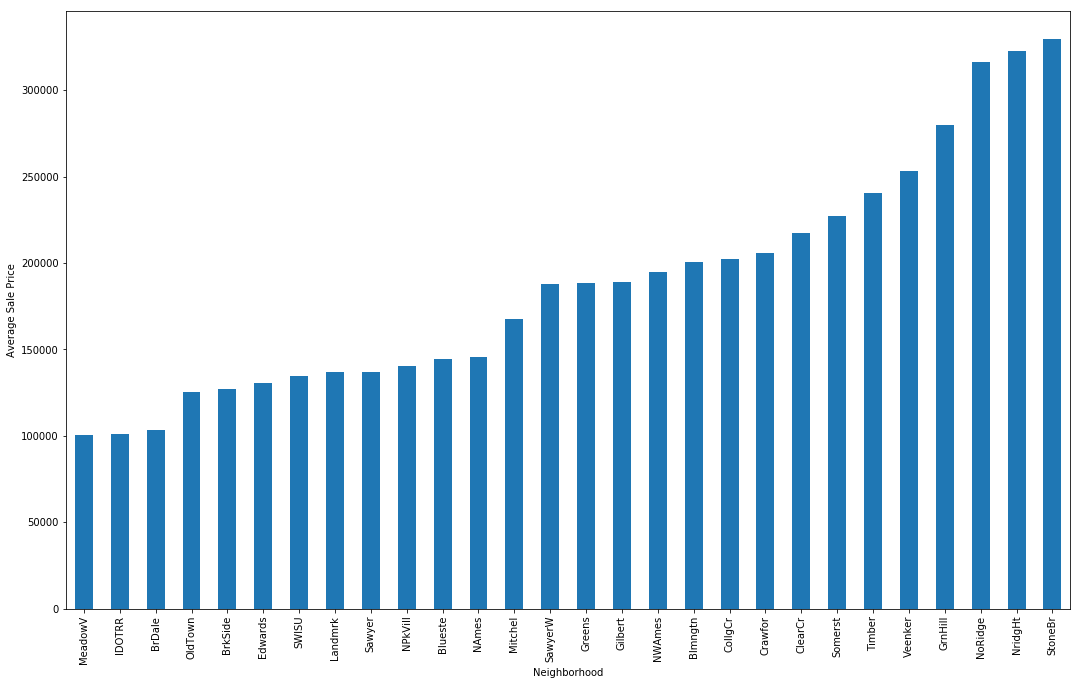

In [284]:
# Group the neighborhoods in train by the average price for each neighborhood
plt.figure(figsize=(18, 11))
train.groupby(by='Neighborhood')['SalePrice'].mean().sort_values(ascending=True).plot(kind='bar')
plt.ylabel('Average Sale Price');

In [285]:
# Group the neighborhoods in train by the average price for each neighborhood
# train.groupby(by='')[pred_6].mean().sort_values(ascending=True).plot(kind='bar');
train[train['Neighborhood'] == 'StoneBr'].nunique()

Id                      38
PID                     38
MS SubClass              4
MS Zoning                1
Lot Frontage            27
Lot Area                38
Street                   1
Lot Shape                3
Land Contour             3
Utilities                1
Lot Config               3
Land Slope               2
Neighborhood             1
Condition 1              3
Condition 2              3
Bldg Type                2
House Style              2
Overall Qual             4
Overall Cond             3
Year Built              19
Year Remod/Add          19
Roof Style               2
Roof Matl                1
Exterior 1st             4
Exterior 2nd             5
Mas Vnr Type             3
Mas Vnr Area            20
Exter Qual               3
Exter Cond               3
Foundation               2
Bsmt Qual                2
Bsmt Cond                2
Bsmt Exposure            4
BsmtFin Type 1           3
BsmtFin SF 1            31
BsmtFin Type 2           3
BsmtFin SF 2             3
B

In [286]:
high_val = train[train['SalePrice'] > 200_000]

In [287]:
high_val['Year Built'].value_counts().head(15)

2006    69
2007    56
2005    55
2003    34
2008    33
2004    32
2002    24
2000    23
1998    21
2001    19
1999    18
1993    17
1996    15
1995    14
1994    14
Name: Year Built, dtype: int64

In [288]:
high_val.groupby(by='Year Built')['SalePrice'].mean().sort_values(ascending=True).tail(10)

Year Built
2006    303148.028986
1971    308500.000000
1939    311500.000000
2009    314310.333333
1983    316600.000000
1893    325000.000000
2008    340945.636364
1972    345000.000000
1981    345333.333333
1892    475000.000000
Name: SalePrice, dtype: float64

In [289]:
# train.groupby('Year Built')['Yr Sold']
train['Yr Sold'].value_counts()

2007    497
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

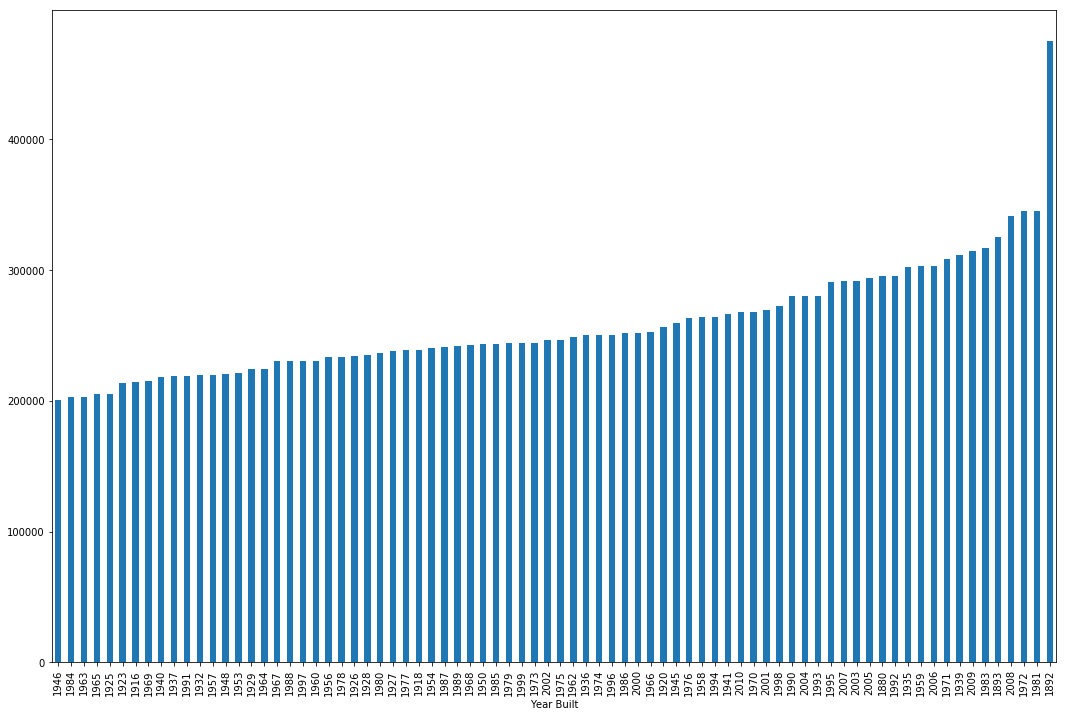

In [290]:
plt.figure(figsize=(18,12))
high_val.groupby(by='Year Built')['SalePrice'].mean().sort_values(ascending=True).plot(kind='bar');

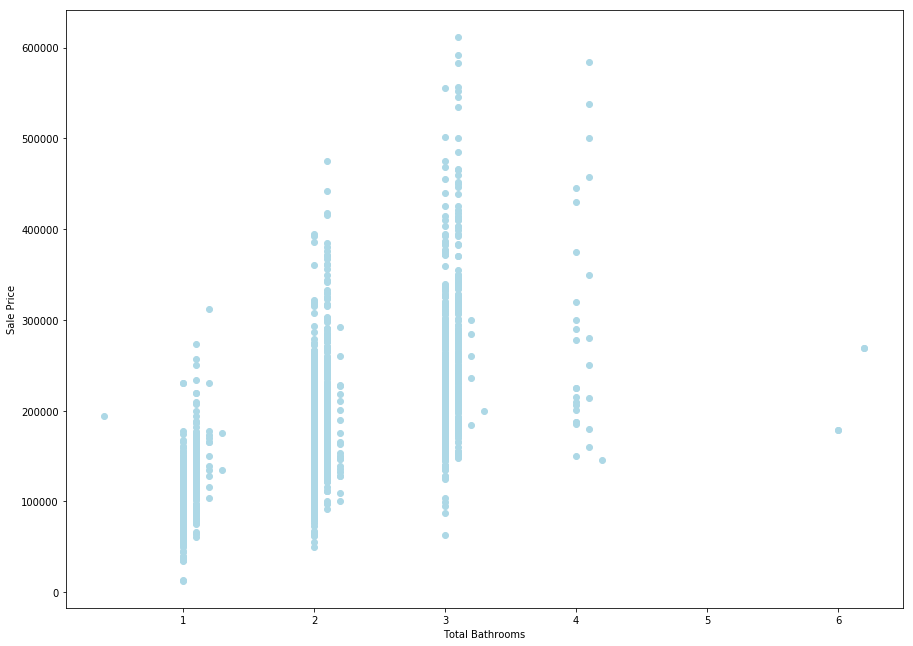

In [291]:
plt.figure(figsize=(15, 11))
plt.scatter(train['Total Bathrooms'], train['SalePrice'], c='lightblue')
plt.xlabel('Total Bathrooms')
plt.ylabel('Sale Price');

In [292]:
train['Total Bathrooms'].value_counts()

2.0    621
2.1    389
1.0    315
3.0    256
3.1    200
1.1    193
2.2     22
4.0     17
1.2     13
4.1     10
3.2      5
6.2      2
6.0      2
1.3      2
0.4      1
4.2      1
3.3      1
Name: Total Bathrooms, dtype: int64

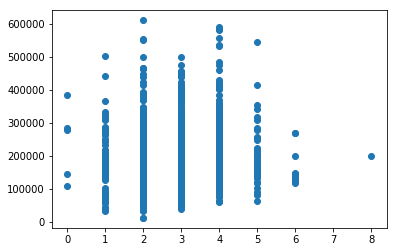

In [293]:
plt.scatter(train['Bedroom AbvGr'], train['SalePrice']);

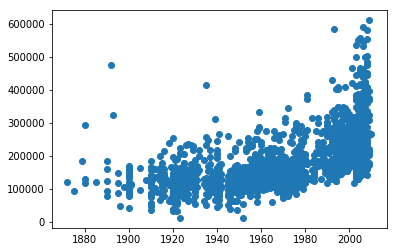

In [294]:
plt.scatter(train['Year Built'], train['SalePrice']);

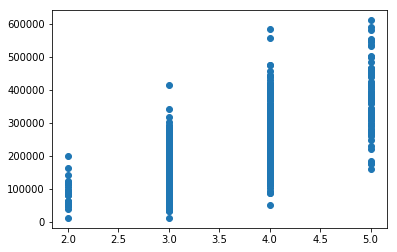

In [295]:
plt.scatter(train['Exter Qual'], train['SalePrice']);

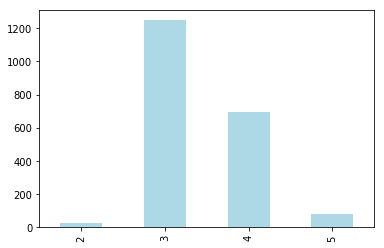

In [296]:
train['Exter Qual'].value_counts().sort_index().plot(kind='bar', y='SalePrice', color='lightblue');

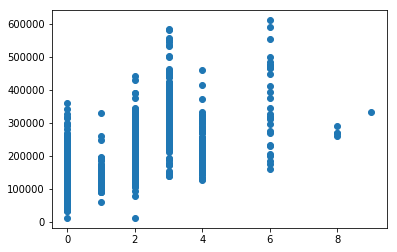

In [297]:
plt.scatter(train['Garages & Fireplaces'], train['SalePrice']);

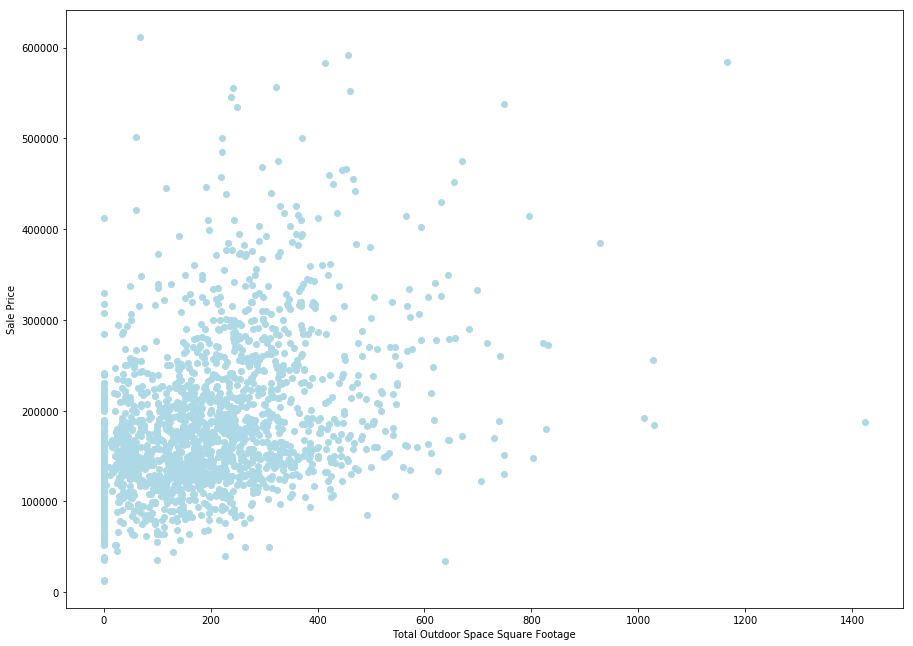

In [298]:
plt.figure(figsize=(15, 11))
plt.scatter(train['Outdoor Space SF'], train['SalePrice'], c='lightblue')
plt.xlabel('Total Outdoor Space Square Footage')
plt.ylabel('Sale Price');

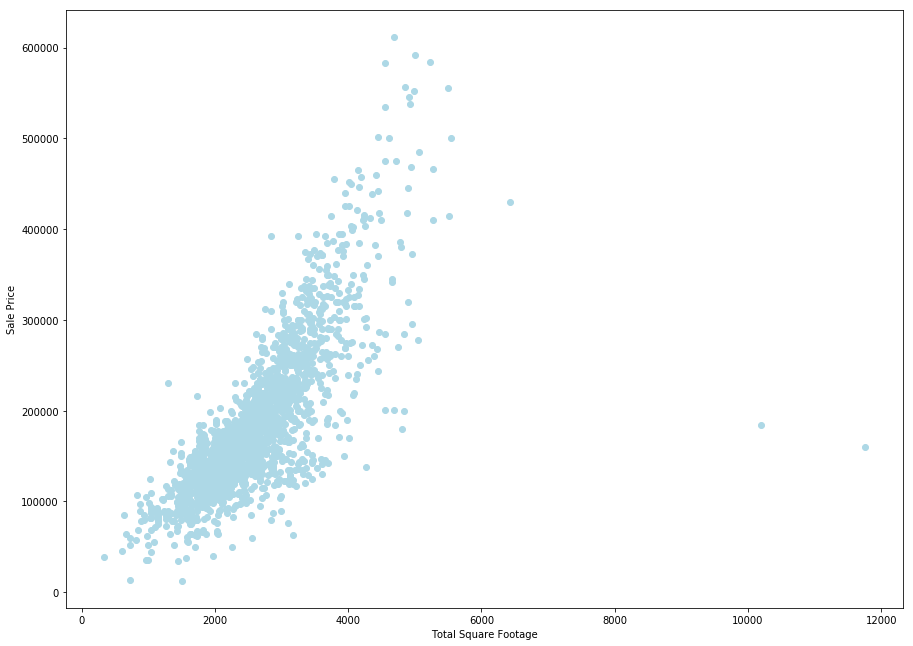

In [299]:
plt.figure(figsize=(15, 11))

plt.scatter(train['Total SF'], train['SalePrice'], c='lightblue')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price');

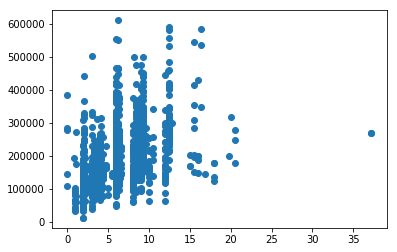

In [300]:
plt.scatter(train['Total Bath * Bed'], train['SalePrice']);

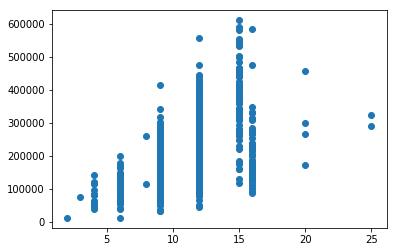

In [301]:
plt.scatter(train['Exter Qual * Cond'], train['SalePrice']);

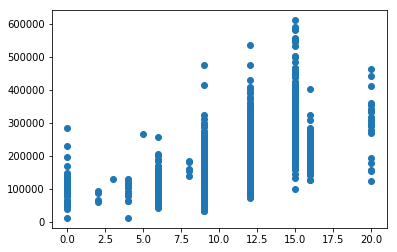

In [302]:
plt.scatter(train['Bsmt Qual * Cond'], train['SalePrice']);

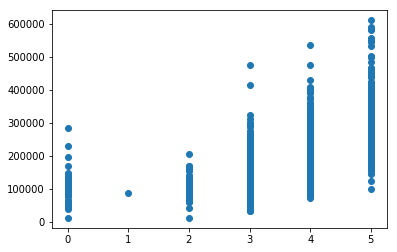

In [303]:
plt.scatter(train['Bsmt Qual'], train['SalePrice']);

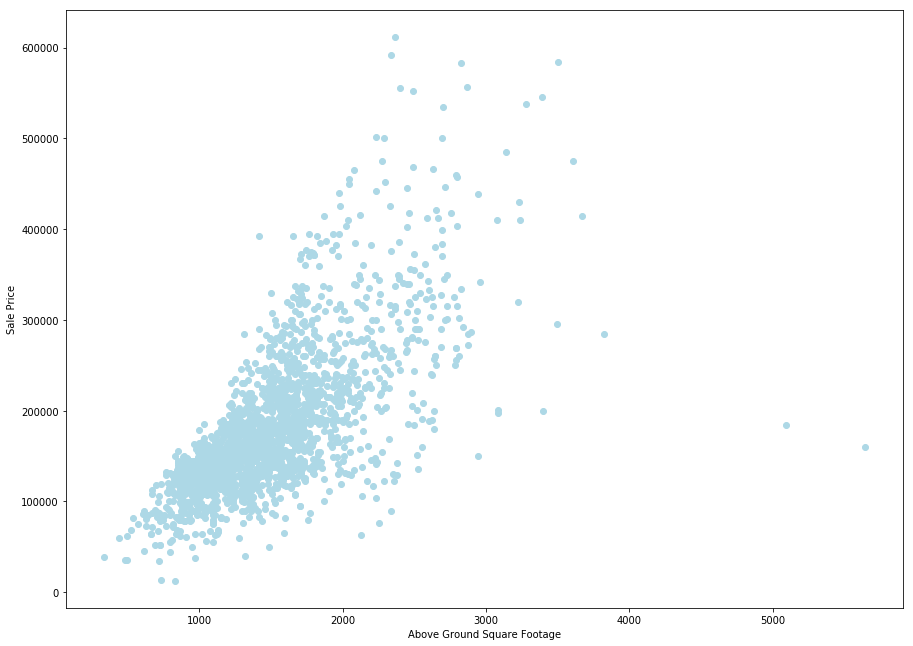

In [304]:
plt.figure(figsize=(15, 11))
plt.scatter(train['Gr Liv Area'], train['SalePrice'], c='lightblue')
plt.xlabel('Above Ground Square Footage')
plt.ylabel('Sale Price');

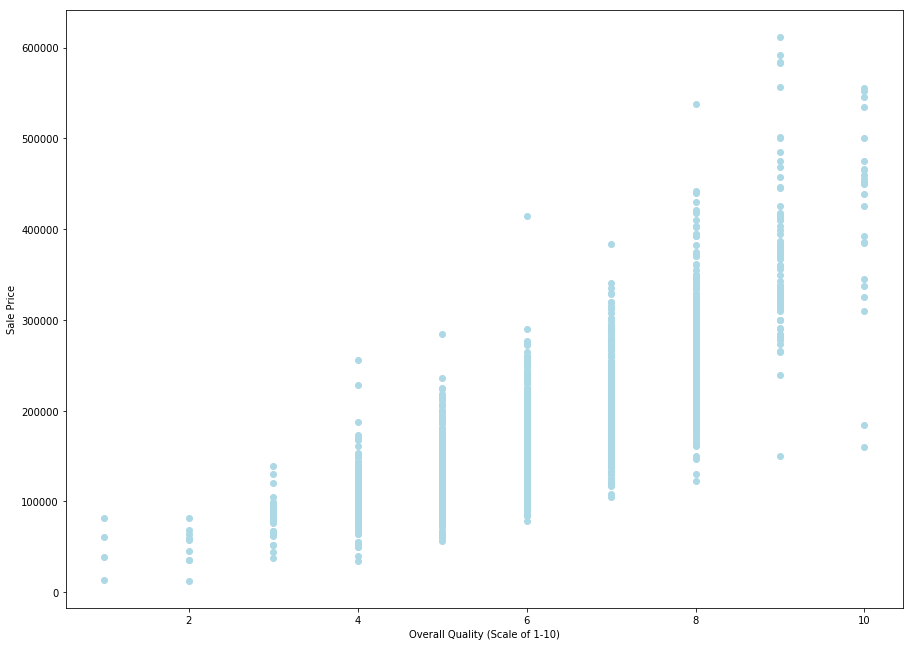

In [305]:
plt.figure(figsize=(15, 11))
plt.scatter(train['Overall Qual'], train['SalePrice'], c='lightblue')
plt.xlabel('Overall Quality (Scale of 1-10)')
plt.ylabel('Sale Price');
# train['Overall Qual'].value_counts().sort_index().plot(kind='bar', y='SalePrice', color='lightblue');

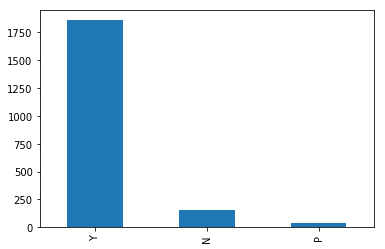

In [306]:
train['Paved Drive'].value_counts().plot(kind='bar', y='SalePrice');

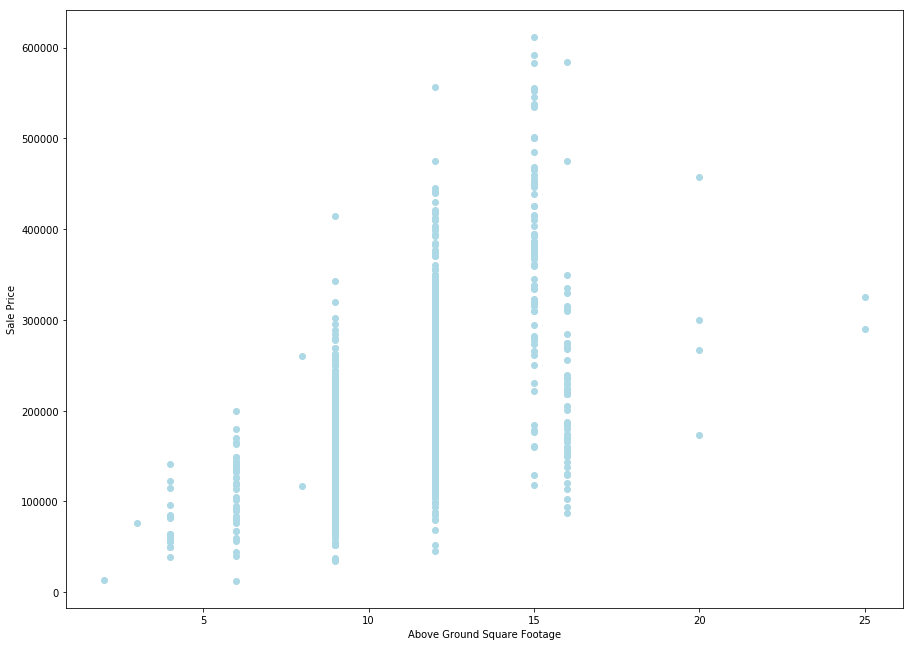

In [307]:
plt.figure(figsize=(15, 11))
plt.scatter(train['Exter Qual * Cond'], train['SalePrice'], c='lightblue')
plt.xlabel('Above Ground Square Footage')
plt.ylabel('Sale Price');

In [308]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Total SF,Total Full Bath,Total Half Bath,Total Bathrooms,Garages & Fireplaces,Outdoor Space SF,Pool & Deck,Paved Drive_P,Paved Drive_Y,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Total Bath * Bed,Exter Qual * Cond,Bsmt Qual * Cond
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,0,3,2010,WD,130500,2204.0,2.0,0.1,2.1,0.0,44,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6.3,12,9
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,5,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,0,4,2009,WD,220000,3035.0,3.0,0.1,3.1,2.0,74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.4,12,12
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,3,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,0,1,2010,WD,109000,2114.0,2.0,0.0,2.0,0.0,52,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6.0,12,9
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,0,4,2010,WD,174000,1828.0,2.0,0.1,2.1,0.0,100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,9,12
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,3,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,0,3,2010,WD,138500,2121.0,2.0,0.0,2.0,0.0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6.0,9,8


## Conclusions

Setting a home sale price is a complex process. There is no one feature to consider that could determine the price on it's own. Square footage, whether it be of the entire home or specifically above ground, is a good predictor of sale prices, but it should not be the sole factor. As other features increment - bathrooms or halfbathrooms, outdoor space in the form of a deck, garage space, finished basements, number of fireplaces, neighborhood - a sale price can start to rise. When someone is buying a home, they never say "This house has 1,700 square feet, I'm sold". It's normally something more like "This house has 1,700 square feet, 2.5 bathrooms, 3 bedrooms, a fireplace, a 2 car garage, and is located near one of the best elementary schools in the city, I'll buy it."

I primarily used linear regression in my modeling phase to predict prices on the test data. I also tested out using k nearest neighbors and gridsearch to optimize the hyperparameters, however I got a realy bad score so went back to Linear Regression. I would have liked to try some other models, but at this point I feel most comfortable with using the Linear Regression Model and will come back to maybe add some models to this later on. 

I also would maybe try to map neighborhoods to relevant elementary schools and their ranking in the city or state with the education department. I think this might be powerful in predicting prices. 

## Sources

- http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

- https://www.tandfonline.com/doi/full/10.1080/10691898.2008.11889569